In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


In [2]:
df= pd.read_csv("/content/Dataset .csv")

In [3]:
df_geo = df.dropna(subset=['Latitude', 'Longitude'])

In [4]:
gdf = gpd.GeoDataFrame(
    df_geo,
    geometry=gpd.points_from_xy(df_geo['Longitude'], df_geo['Latitude']),
    crs="EPSG:4326"
)


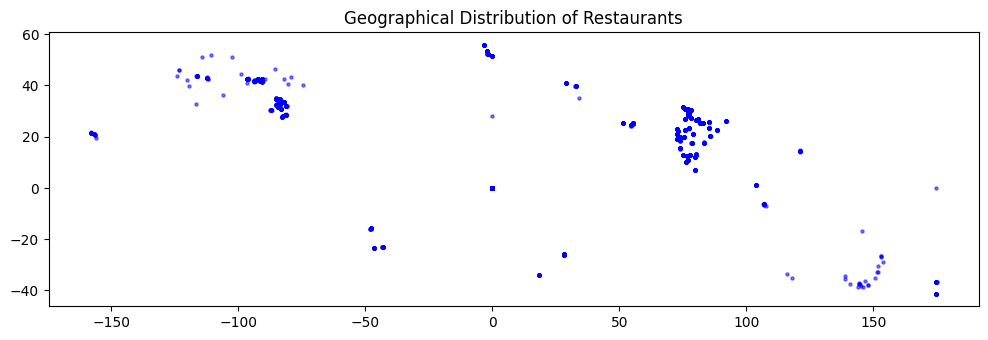

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, markersize=5, alpha=0.5, color='blue')
ax.set_title("Geographical Distribution of Restaurants")
plt.show()


In [6]:
city_stats = df_geo.groupby('City').agg({
    'Restaurant ID': 'count',
    'Aggregate rating': 'mean',
    'Price range': 'mean'
}).rename(columns={
    'Restaurant ID': 'Restaurant Count',
    'Aggregate rating': 'Average Rating',
    'Price range': 'Average Price Range'
}).sort_values(by='Restaurant Count', ascending=False)

print("Top Cities by Restaurant Count:")
print(city_stats.head())

Top Cities by Restaurant Count:
           Restaurant Count  Average Rating  Average Price Range
City                                                            
New Delhi              5473        2.438845             1.621597
Gurgaon                1118        2.651431             1.855993
Noida                  1080        2.036204             1.601852
Faridabad               251        1.866932             1.454183
Ghaziabad                25        2.852000             1.800000
